In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [11]:
# 通过这一个链接可以同时取得6家股票的数据，最终扔掉最后一个，只要5家
url1="https://push2.eastmoney.com/api/qt/slist/get?fltt=1&invt=2&cb=jQuery3510005071344345702888_1711447158089&fields=f12%2Cf13%2Cf14%2Cf3%2Cf152%2Cf4%2Cf1%2Cf2&secid=0.300059&ut=fa5fd1943c7b386f172d6893dbfba10b&pi=0&po=1&np=1&fid=f3&pz=6&spt=4&wbp2u=%7C0%7C0%7C0%7Cweb&_=1711447158090"
res = requests.get(url1)
a=res.text.find('(')
import json
import pandas as pd
obj = json.loads(res.text[a+1:-2])
obj["data"]['diff'][0:5]

[{'f1': 2,
  'f2': 469,
  'f3': 399,
  'f4': 18,
  'f12': '300096',
  'f13': 0,
  'f14': 'ST易联众',
  'f152': 2},
 {'f1': 2,
  'f2': 2414,
  'f3': 285,
  'f4': 67,
  'f12': '301396',
  'f13': 0,
  'f14': '宏景科技',
  'f152': 2},
 {'f1': 2,
  'f2': 704,
  'f3': 247,
  'f4': 17,
  'f12': '300419',
  'f13': 0,
  'f14': '浩丰科技',
  'f152': 2},
 {'f1': 2,
  'f2': 1128,
  'f3': 236,
  'f4': 26,
  'f12': '838924',
  'f13': 0,
  'f14': '广脉科技',
  'f152': 2},
 {'f1': 2,
  'f2': 2199,
  'f3': 199,
  'f4': 43,
  'f12': '838227',
  'f13': 0,
  'f14': '美登科技',
  'f152': 2}]

In [12]:
# f2代表最新价（以分为单位，故如1486=14.86元，等下进行转换），f14代表股票名称
# print(time.localtime())
result=pd.DataFrame([{'f2':'','f14':'','date':''}])
result=result.drop([0])
for i in range(10):
    res = requests.get(url1)
    a=res.text.find('(')
    obj = json.loads(res.text[a+1:-2])
    df=pd.DataFrame(obj['data']['diff'][0:5])
    df=df[['f2','f14']]
    current_time=datetime.datetime.now()
    df['date']=current_time.strftime("%d/%m/%Y, %H:%M:%S")
    result=pd.concat([result,df],ignore_index=True)
    time.sleep(3)
result.rename(columns={'f2':"最新价",'f14':'股票名称'},inplace=True)
result['最新价']/=100


In [13]:
result

,最新价,股票名称,date
0,4.68,ST易联众,"27/03/2024, 10:31:20"
1,24.1,宏景科技,"27/03/2024, 10:31:20"
2,7.04,浩丰科技,"27/03/2024, 10:31:20"
3,11.28,广脉科技,"27/03/2024, 10:31:20"
4,21.99,美登科技,"27/03/2024, 10:31:20"
5,4.68,ST易联众,"27/03/2024, 10:31:23"
6,24.1,宏景科技,"27/03/2024, 10:31:23"
7,7.04,浩丰科技,"27/03/2024, 10:31:23"
8,11.28,广脉科技,"27/03/2024, 10:31:23"
9,21.99,美登科技,"27/03/2024, 10:31:23"


In [7]:
result.to_csv("try.csv")

In [11]:
time_str = "22:25:50"
time_obj=datetime.datetime.strptime(time_str,"%H:%M:%S")
timestamp1 = (time_obj - datetime.datetime(1970, 1, 1)).total_seconds()
time_str2 = "22:26:50"
time_obj2=datetime.datetime.strptime(time_str2,"%H:%M:%S")
timestamp1 = (time_obj - datetime.datetime(1970, 1, 1)).total_seconds()
print(time_obj,time_obj2)

1900-01-01 22:25:50 1900-01-01 22:26:50


C:\Users\lenovo\AppData\Local\Temp\ipykernel_23824\3240819132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date']=data['date'].apply(lambda x:  datetime.datetime.strptime(x, "%d/%m/%Y, %H:%M:%S").strftime("%H:%M:%S"))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_23824\3240819132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date']=data['date'].apply(lambda x:  datetime.datetime.strptime(x, "%d/%m/%Y, %H:%M:%S").strftime("%H:%M:%S"))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_23824

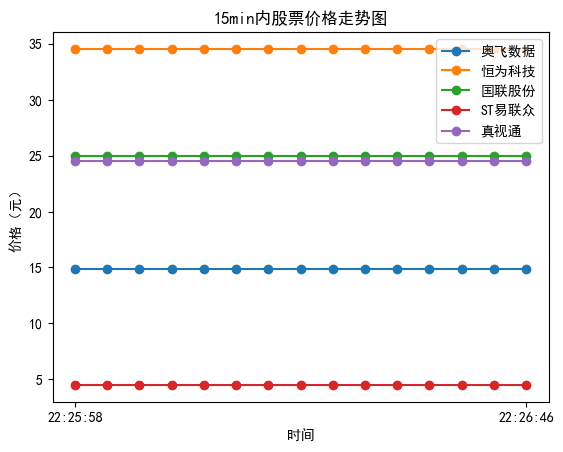

In [12]:
namelist=['奥飞数据','恒为科技','国联股份','ST易联众','真视通']
for name in namelist:
    data=result[result['股票名称']==name]
    data['date']=data['date'].apply(lambda x:  datetime.datetime.strptime(x, "%d/%m/%Y, %H:%M:%S").strftime("%H:%M:%S"))
    data=data[['最新价','date']]
    x=data['date']
    y=data['最新价']
    # print(x)
    # print(y)
    # display(data)
    plt.plot(x,y,label=name,marker='o')
# plt.xlim(time_obj,time_obj2)
plt.xticks(["22:25:58","22:26:46"])
# 添加轴标签和标题
plt.xlabel('时间')  # x 轴标签
plt.ylabel('价格（元）')  # y 轴标签
plt.title('15min内股票价格走势图')  # 图形标题
# 添加图例
plt.legend(loc='upper right')
# 显示图形
plt.show()


In [ ]:
namelist=['奥飞数据','恒为科技','国联股份','ST易联众','真视通']
color1=['blue','red','orange','green','pink']
for name in namelist:
    data=result[result['股票名称']==name]
    data['date']=data['date'].apply(lambda x:  datetime.datetime.strptime(x, "%d/%m/%Y, %H:%M:%S").strftime("%H:%M:%S"))
    data=data[['最新价','date']]
    x=data['date']
    y=data['最新价']
    # print(x)
    # print(y)
    # display(data)
    plt.figure()
    plt.plot(x,y,label=name,marker='o',color=color1[i-1])
    plt.xticks(["22:25:58","22:26:46"])
    # 添加轴标签和标题
    plt.xlabel('时间')  # x 轴标签
    plt.ylabel('价格（元）')  # y 轴标签
    plt.title('15min内股票价格走势图')  # 图形标题
    # 添加图例
    plt.legend(loc='upper right')
# # plt.xlim(time_obj,time_obj2)
# plt.xticks(["22:25:58","22:26:46"])
# # 添加轴标签和标题
# plt.xlabel('时间')  # x 轴标签
# plt.ylabel('价格（元）')  # y 轴标签
# plt.title('15min内股票价格走势图')  # 图形标题
# # 添加图例
# plt.legend(loc='upper right')
# 显示图形
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23824\2986668340.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date']=data['date'].apply(lambda x:  datetime.datetime.strptime(x, "%d/%m/%Y, %H:%M:%S").strftime("%H:%M:%S"))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_23824\2986668340.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date']=data['date'].apply(lambda x:  datetime.datetime.strptime(x, "%d/%m/%Y, %H:%M:%S").strftime("%H:%M:%S"))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_23824

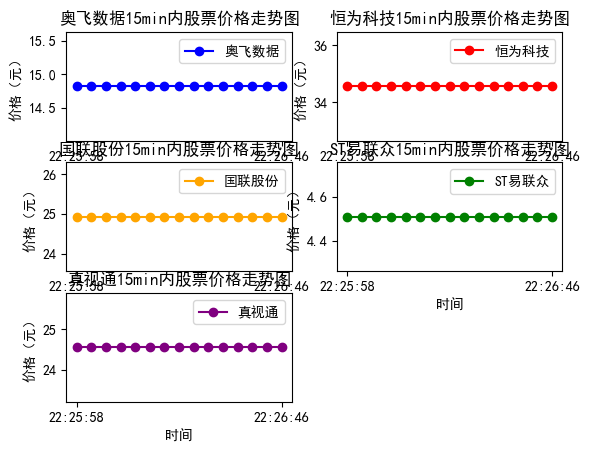

In [17]:
namelist=['奥飞数据','恒为科技','国联股份','ST易联众','真视通']
i=1
color1=['blue','red','orange','green','purple']
for name in namelist:
    data=result[result['股票名称']==name]
    data['date']=data['date'].apply(lambda x:  datetime.datetime.strptime(x, "%d/%m/%Y, %H:%M:%S").strftime("%H:%M:%S"))
    data=data[['最新价','date']]
    x=data['date']
    y=data['最新价']
    # print(x)
    # print(y)
    # display(data)
    plt.subplot(3,2,i)
    plt.plot(x,y,label=name,marker='o',color=color1[i-1])
    plt.xticks(["22:25:58","22:26:46"])
    # 添加轴标签和标题
    plt.xlabel('时间')  # x 轴标签
    plt.ylabel('价格（元）')  # y 轴标签
    plt.title(f'{name}15min内股票价格走势图')  # 图形标题
    # 添加图例
    plt.legend(loc='upper right')
    i+=1

plt.show()